In [29]:
from prophet import Prophet 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [30]:

incoming_data = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/incoming_packages.csv")


In [31]:
incoming_data.head()

,date,total_packages,cooled_packages,fire_packages,normal_packages
0,2020-01-01,1745,370,488,887
1,2020-01-02,1847,308,402,1137
2,2020-01-03,1842,314,394,1134
3,2020-01-04,664,131,181,352
4,2020-01-05,871,137,190,544


In [32]:
incoming_data.shape

(851, 5)

In [33]:
incoming_data = incoming_data[['date','total_packages']]
incoming_data.head()

,date,total_packages
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


### Finns det någon säsongsvariation? I så fall, vilka?

### Det finns spikar i november och december, vad kan det bero på?

### Finns det någon trend?

### Finns det några dagar med extrema värden?

<AxesSubplot:>

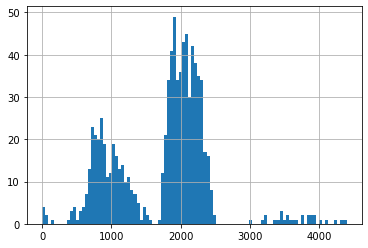

In [34]:
incoming_data['total_packages'].hist(bins=100)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<function matplotlib.pyplot.show(close=None, block=None)>

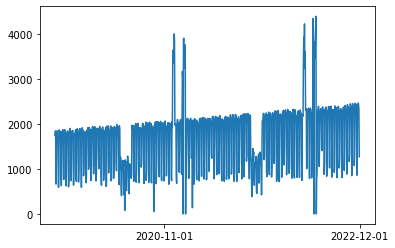

In [47]:
plt.plot(incoming_data['date'],incoming_data['total_packages'])
plt.xticks(['2020-11-01','2022-12-01'])
plt.show

In [28]:
model_pro= Prophet()

In [36]:
incoming_data['ds']= incoming_data['date']
incoming_data['y']=incoming_data['total_packages']

In [41]:
trien_data= incoming_data[incoming_data['ds'] < '2022-04-01']
test_data=incoming_data[incoming_data['ds'] > '2022-04-01']


In [37]:
incoming_data[['ds','y']].head()

,ds,y
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


In [42]:
model_pro.fit(trien_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.5898


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1567.44   3.87671e-06       93.0469       1.253      0.2714      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       1567.44   4.95923e-07        94.177   5.141e-09       0.001      186  LS failed, Hessian reset 
     134       1567.44   3.51321e-08       88.8264      0.3557           1      211   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [43]:
framtid=model_pro.make_future_dataframe(periods=365)

In [44]:
forecast=model_pro.predict(framtid)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


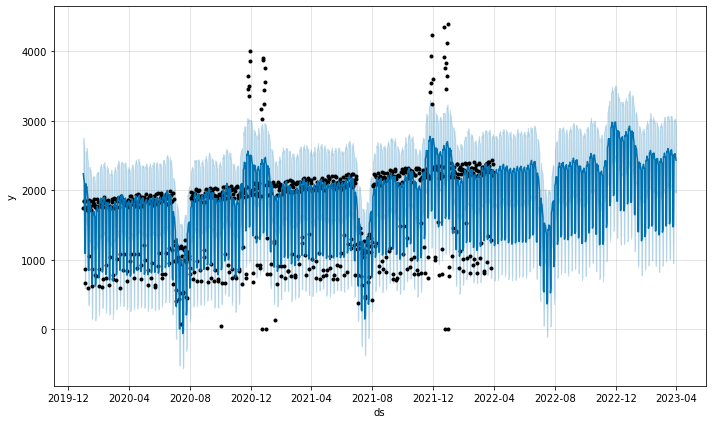

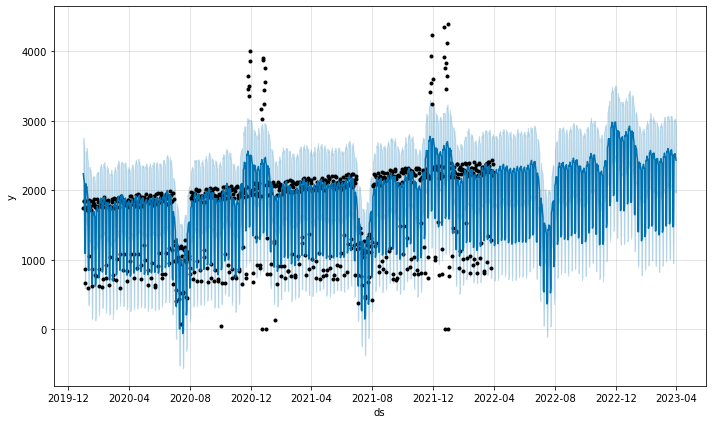

In [45]:
model_pro.plot(forecast)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


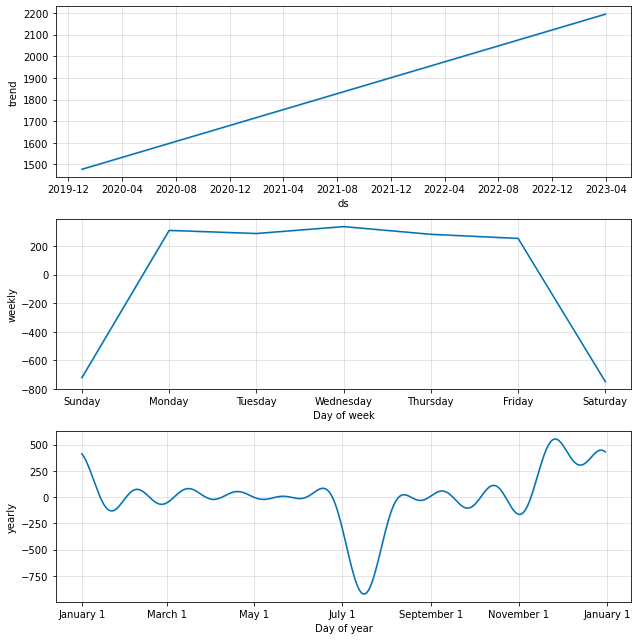

In [46]:
fig=model_pro.plot_components(forecast)

In [ ]:
mean_absolute_error()